In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
dataset = pd.read_csv('C:/Users/0974/Documents/Google Colab/Datasets/ml - regression/housing.csv')

dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

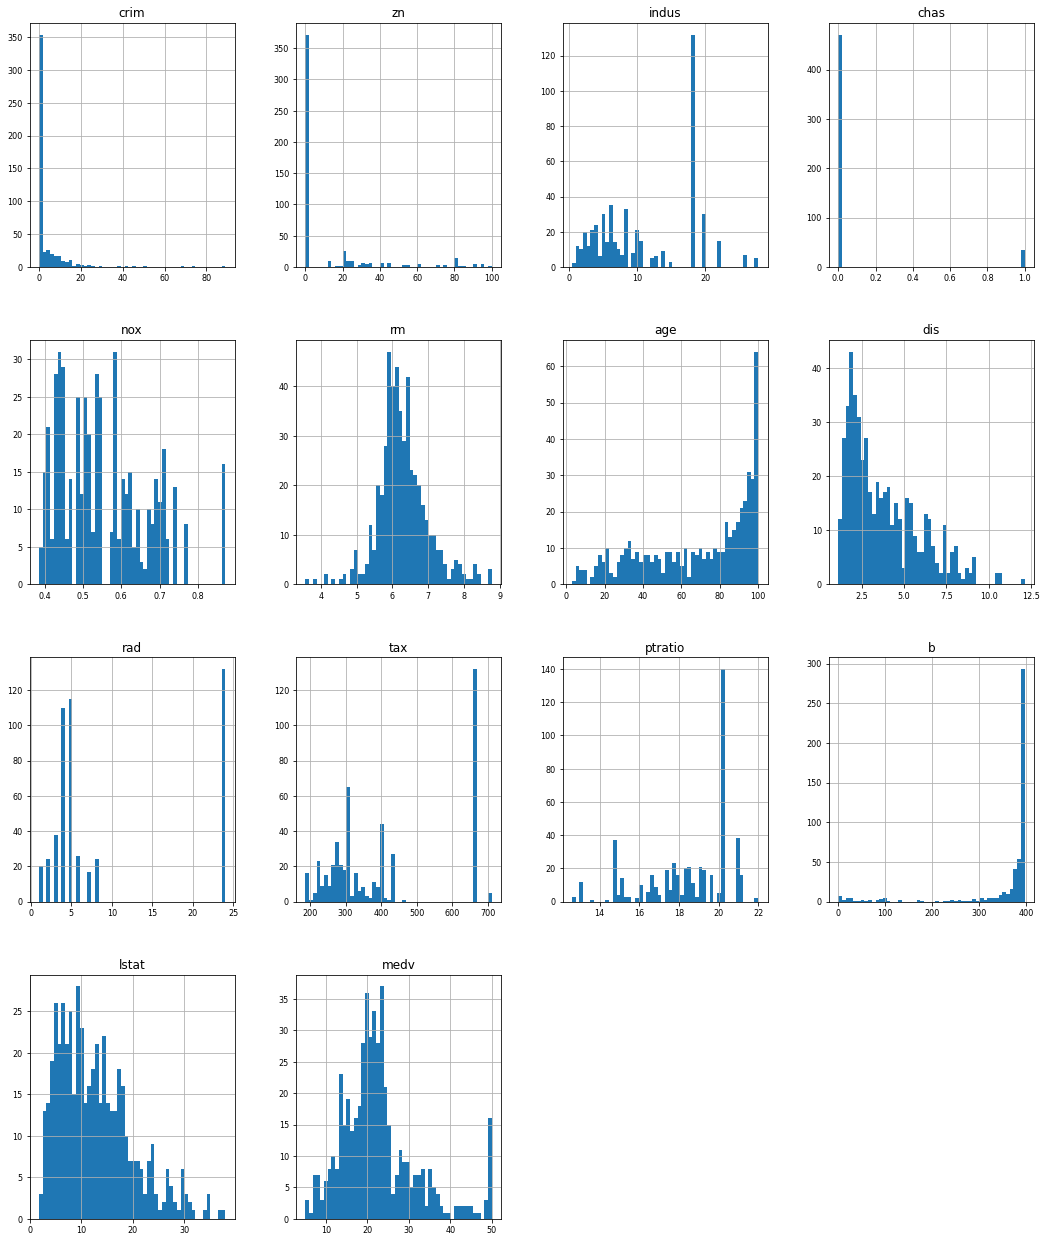

In [5]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='rm', ylabel='zn'>,
        <AxesSubplot:xlabel='medv', ylabel='zn'>],
       [<AxesSubplot:xlabel='zn', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='medv', ylabel='rm'>],
       [<AxesSubplot:xlabel='zn', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='medv', ylabel='medv'>]], dtype=object)

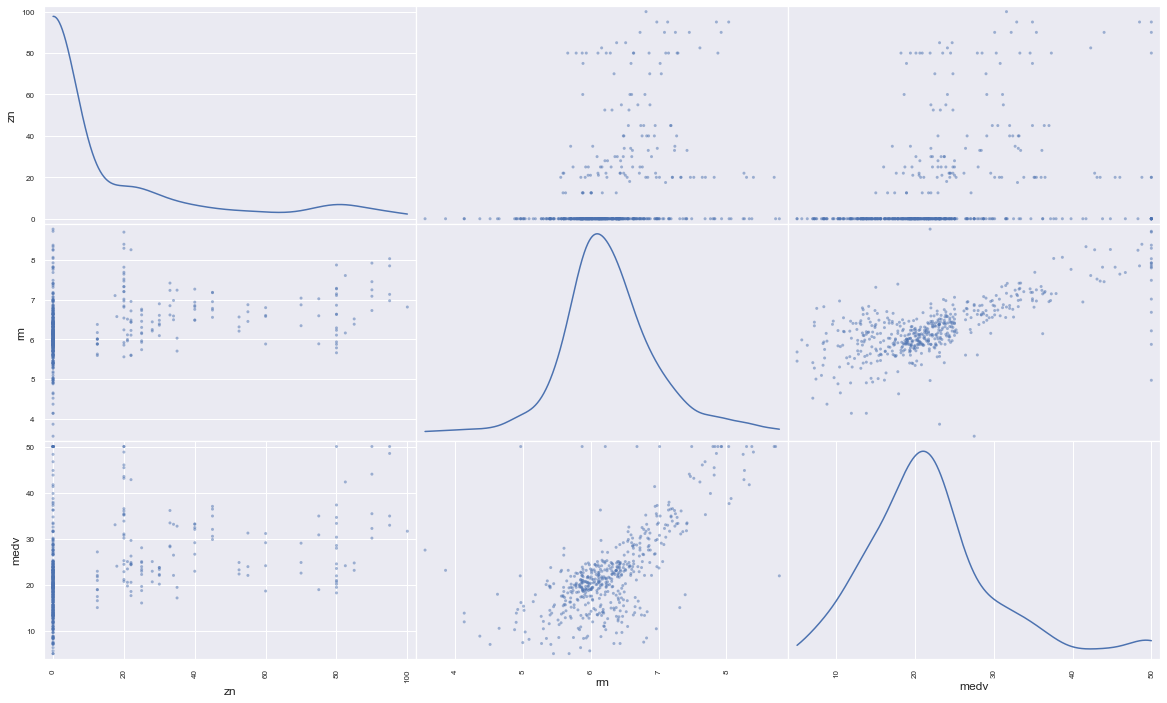

In [6]:
sns.set()
feat = ['zn','rm', 'medv']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

In [7]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
#Mengecek Nilai 0 pada masing2 column
for i in dataset.columns:
   y = np.array(dataset[i])
   zero = np.count_nonzero( y == 0)
   print(i, ': ', zero)

crim :  0
zn :  372
indus :  0
chas :  471
nox :  0
rm :  0
age :  0
dis :  0
rad :  0
tax :  0
ptratio :  0
b :  0
lstat :  0
medv :  0


Nilai 0 terdapat pada zn dan chas.
zn merupakan bagian wilayah penduduk untuk zona lebih dari 25,000 sq.ft sehingga memungkinkan memiliki nilai 0.and
chas / Charles river dummy variable (1 jika berdekatan dengan sungai, 0 jika tidak) menyimpulkan bahwa dapat memiliki nilai 0 

In [10]:
corr = dataset.corr()['medv'][:-1].sort_values(ascending=False)
corr_df = pd.DataFrame({'Column':corr.index, 'Correlation with medv': corr.values})
corr_df

,Column,Correlation with medv
0,rm,0.695360
1,zn,0.360445
2,b,0.333461
3,dis,0.249929
4,chas,0.175260
5,age,-0.376955
6,rad,-0.381626
7,crim,-0.388305
8,nox,-0.427321
9,tax,-0.468536


<AxesSubplot:>

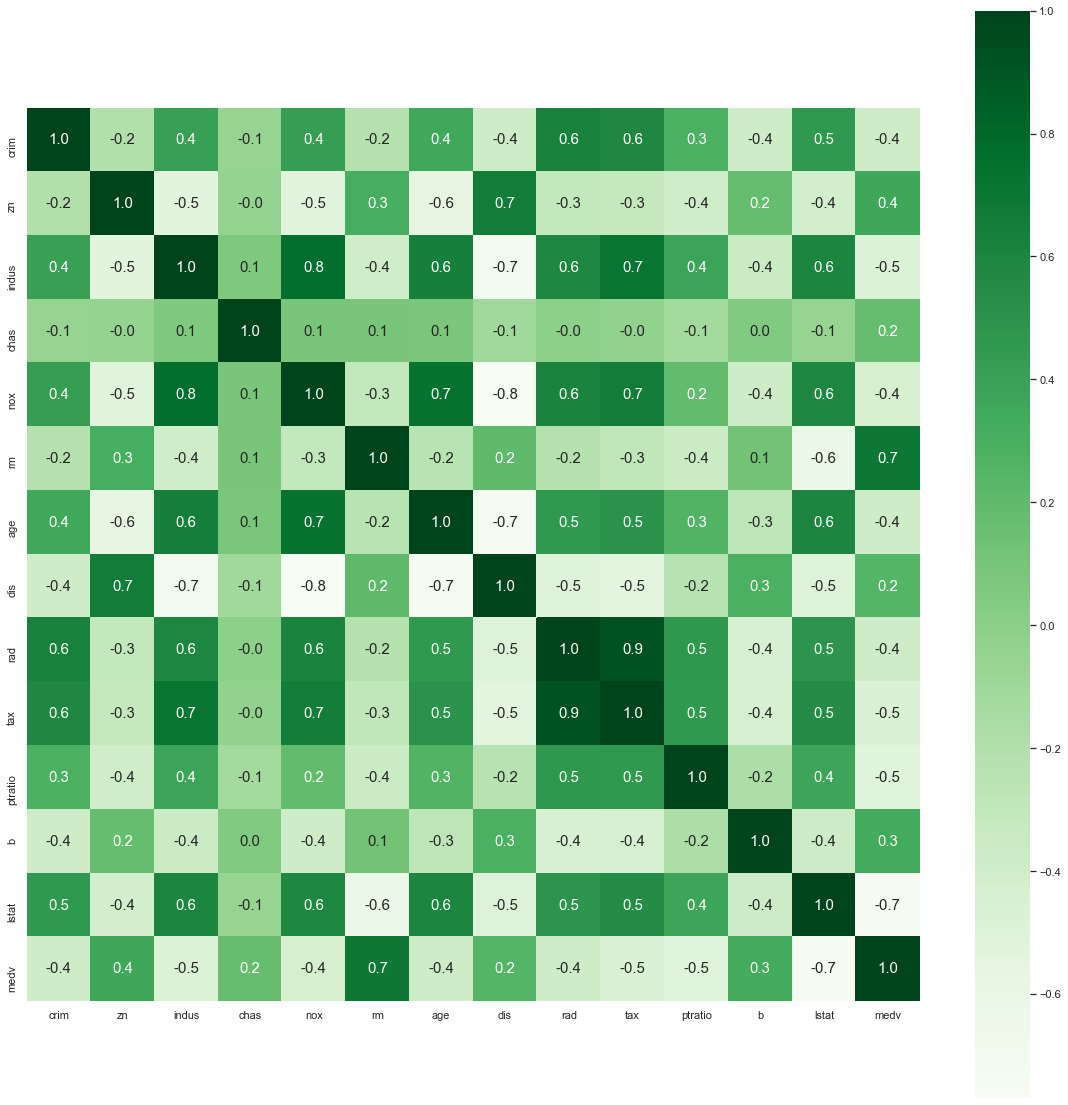

In [11]:
corr1 = dataset.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr1, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Nomor 01

In [3]:
label = dataset['medv']
feature = dataset.drop(['medv'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

scale = ["StandardScaler", "PowerTransformer (Method=Yoe-Johnson)", "QuantileTransformer", "MixMaxScaler", "MaxAbsScaler", "RobustScaler"]

scaler = [ StandardScaler(),PowerTransformer(method='yeo-johnson'),
QuantileTransformer(output_distribution='normal'),
MinMaxScaler(feature_range=(0,1), copy=True),
MaxAbsScaler(copy=True),
RobustScaler(with_centering=True, with_scaling=True, quantile_range=(0.25, 0.75),copy=True)]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def housescaler(name, scaling):
    for n in range(len(name)):
        feature_s = scaling[n].fit_transform(feature.values)
        label_s = scaling[n].fit_transform(dataset['medv'].values.reshape(-1,1)).flatten()

        feature_train, feature_test, label_train, label_test = train_test_split(feature_s, label_s, test_size=0.25, random_state=10)

        lm = LinearRegression()
        lm.fit(feature_train, label_train)

        predictions = lm.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print(name[n])
        print("MSE (Mean Squared Error) : ", round(mse,3))
        print("MAE (Mean Absolute Error) : ", round(mae,3))
        print("r^2 score : ", round(r2,3))
        print("RMSE (Root Maen Squared Error) : ", round(np.sqrt(mse),3))
        print("Nilai SI (Scatter Index) : ", round(np.sqrt(mse)/mae, 3))
        print("\n")
    return

In [6]:
housescaler(scale,scaler)

StandardScaler
MSE (Mean Squared Error) :  0.384
MAE (Mean Absolute Error) :  0.42
r^2 score :  0.675
RMSE (Root Maen Squared Error) :  0.62
Nilai SI (Scatter Index) :  1.477


PowerTransformer (Method=Yoe-Johnson)
MSE (Mean Squared Error) :  0.238
MAE (Mean Absolute Error) :  0.351
r^2 score :  0.766
RMSE (Root Maen Squared Error) :  0.488
Nilai SI (Scatter Index) :  1.39


QuantileTransformer
MSE (Mean Squared Error) :  0.589
MAE (Mean Absolute Error) :  0.496
r^2 score :  0.7
RMSE (Root Maen Squared Error) :  0.768
Nilai SI (Scatter Index) :  1.548


MixMaxScaler
MSE (Mean Squared Error) :  0.016
MAE (Mean Absolute Error) :  0.086
r^2 score :  0.675
RMSE (Root Maen Squared Error) :  0.127
Nilai SI (Scatter Index) :  1.477


MaxAbsScaler
MSE (Mean Squared Error) :  0.013
MAE (Mean Absolute Error) :  0.077
r^2 score :  0.675
RMSE (Root Maen Squared Error) :  0.114
Nilai SI (Scatter Index) :  1.477


RobustScaler
MSE (Mean Squared Error) :  11.309
MAE (Mean Absolute Error) :  2.277
r^2

Nilai pada setiap data processing berbeda-beda.
SI (Scatter Index) = RMSE / Mean (MAE), Nilai RMSE terbaik dapat dilihat apabila SI bernilai kurang dari 1.
Pada scaler data processing diatas, masing-masing memiliki nilai si, yaitu :
StandardScaler = 1.477 
PowerTransformer(Method='Yoe-Johsnon') = 1.39
QuantileTransformer = 1.548
MinMaxScaler = 1.477
MaxAbsScaler = 1.477
RobustScaler = 1.477
Dari data diatas, dapat di ketahui bahwa PowerTransformer(Method='Yoe-Johsnon') memiliki nilai RMSE terbaik dan nilai r^2 score yang dimiliki lebih besar dibandingkan algoritma yang lain.

Data Processing PowerTransformer(Method='Box-Cox') tidak dapat digunakan pada data ini, dikarenakan ada data yang bernilai 0.

Nomor 02

In [7]:
label = dataset['medv']
feature = dataset.drop(['medv'], axis=1)

In [8]:
from sklearn.preprocessing import PowerTransformer
scaler = MaxAbsScaler(copy=True)

feature_s = scaler.fit_transform(feature.values)
label_s = scaler.fit_transform(dataset['medv'].values.reshape(-1,1)).flatten()

In [9]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_s, label_s, test_size=0.25, random_state=10)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [27]:
nameReg = ["RandomForestRegressor (n=10)", "RandomForestRegressor (n=25)", "RandomForestRegressor (n=50)", "RandomForestRegressor (n=75)", "XGBRegressor", "SVM (rbf)", "SVM (linear)", "SVM (poly)", "KNeigbhorsRegressor (k=1)",  "KNeigbhorsRegressor (k=3)",  "KNeigbhorsRegressor (k=5)",  "KNeigbhorsRegressor (k=7)",  "KNeigbhorsRegressor (k=9)",  "KNeigbhorsRegressor (k=11)",  "KNeigbhorsRegressor (k=13)",  "KNeigbhorsRegressor (k=15)"]

regressor = [ RandomForestRegressor(n_estimators=10, max_depth=5),
RandomForestRegressor(n_estimators=25, max_depth=5),
RandomForestRegressor(n_estimators=50, max_depth=5),
RandomForestRegressor(n_estimators=75, max_depth=5),
xgb.XGBRegressor(max_depth=4),
SVR(kernel='rbf', gamma=0.1, epsilon=.1),
SVR(kernel='linear', gamma='auto'),
SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1, coef0=1),
KNeighborsRegressor(n_neighbors=1),
KNeighborsRegressor(n_neighbors=3),
KNeighborsRegressor(n_neighbors=5),
KNeighborsRegressor(n_neighbors=7),
KNeighborsRegressor(n_neighbors=9),
KNeighborsRegressor(n_neighbors=11),
KNeighborsRegressor(n_neighbors=13),
KNeighborsRegressor(n_neighbors=15)]


In [38]:
def regress(name, reg):
    for n in range(len(name)):
        rr = reg[n]
        rr.fit(feature_train, label_train)
        # print(name[n], reg[n])
        predictions = rr.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print(name[n])
        print("MSE (Mean Squared Error) : ", round(mse,3))
        print("MAE (Mean Absolute Error) : ", round(mae,3))
        print("r^2 score : ", round(r2,3))
        print("RMSE (Root Maen Squared Error) : ", round(np.sqrt(mse),3))
        print("Nilai SI (Scatter Index) : ", round(np.sqrt(mse)/mae, 3))
        print("\n")
    return

In [39]:
regress(nameReg, regressor)

RandomForestRegressor (n=10)
MSE (Mean Squared Error) :  0.006
MAE (Mean Absolute Error) :  0.055
r^2 score :  0.858
RMSE (Root Maen Squared Error) :  0.075
Nilai SI (Scatter Index) :  1.367


RandomForestRegressor (n=25)
MSE (Mean Squared Error) :  0.006
MAE (Mean Absolute Error) :  0.056
r^2 score :  0.838
RMSE (Root Maen Squared Error) :  0.08
Nilai SI (Scatter Index) :  1.426


RandomForestRegressor (n=50)
MSE (Mean Squared Error) :  0.006
MAE (Mean Absolute Error) :  0.056
r^2 score :  0.849
RMSE (Root Maen Squared Error) :  0.078
Nilai SI (Scatter Index) :  1.396


RandomForestRegressor (n=75)
MSE (Mean Squared Error) :  0.006
MAE (Mean Absolute Error) :  0.055
r^2 score :  0.858
RMSE (Root Maen Squared Error) :  0.075
Nilai SI (Scatter Index) :  1.38


XGBRegressor
MSE (Mean Squared Error) :  0.005
MAE (Mean Absolute Error) :  0.05
r^2 score :  0.881
RMSE (Root Maen Squared Error) :  0.069
Nilai SI (Scatter Index) :  1.387


SVM (rbf)
MSE (Mean Squared Error) :  0.014
MAE (Mean 

Pada data diatas, dapat dilihat RandomForest Regressor memiliki RMSE dan r^2 score terbaik.
